In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
import statsmodels


In [8]:
df = pd.read_csv("final_weighted_data.csv") 
df.dropna(inplace=True)
df.describe()

,emotion_score,emotional_entry_count,average_sentiment_score,sentiment_entry_count,percentage_difference
count,567.000000,567.000000,567.000000,567.000000,567.000000
mean,-0.611653,13.128748,-0.008601,11.469136,0.006663
std,0.444962,13.748858,0.429899,5.389299,0.296424
min,-1.000000,1.000000,-0.999426,1.000000,-1.503466
25%,-1.000000,3.000000,-0.286510,8.000000,-0.056483
50%,-0.777778,8.000000,0.008051,11.000000,0.002458
75%,-0.325758,19.000000,0.292044,14.000000,0.081689
max,1.000000,64.000000,0.998930,42.000000,5.020164


In [9]:
# Drop rows where emotional_entry_count or sentiment_entry_count is less than 5
df = df[(df["emotional_entry_count"] >= 30) & (df["sentiment_entry_count"] >= 5)]

# Sort dataframe by decreasing emotion_score
df_sorted = df.sort_values(by="emotion_score", ascending=False)

# Print all values
print(df_sorted.to_string(index=False))

  company   segment  emotion_score  emotional_entry_count  average_sentiment_score  sentiment_entry_count  percentage_difference starting_time
facebook2 output192       0.102564                   39.0                 0.008051                   12.0              -0.528991      16:15:30
facebook2 output193      -0.121212                   33.0                 0.330296                    6.0               0.009395      16:16:30
facebook2 output237      -0.200000                   30.0                 0.110283                    9.0              -0.022124      17:00:30
facebook2 output194      -0.200000                   45.0                -0.155409                   14.0              -0.517661      16:17:30
facebook2 output090      -0.222222                   36.0                -0.175257                   14.0              -0.014858      14:33:30
facebook2 output269      -0.222222                   36.0                 0.229924                    8.0               0.025775      17:32:30

### Predicting Sentiment Analysis Score using Multivariate Regression for Emotions

                               OLS Regression Results                              
Dep. Variable:     average_sentiment_score   R-squared:                       0.059
Model:                                 OLS   Adj. R-squared:                  0.045
Method:                      Least Squares   F-statistic:                     4.374
Date:                     Tue, 08 Apr 2025   Prob (F-statistic):             0.0401
Time:                             00:11:57   Log-Likelihood:                -33.170
No. Observations:                       72   AIC:                             70.34
Df Residuals:                           70   BIC:                             74.89
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

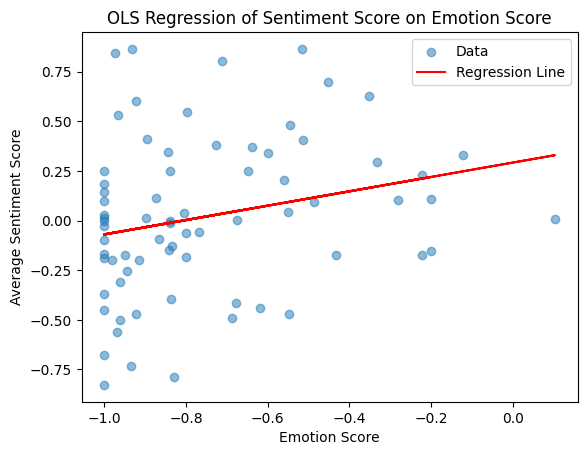

In [10]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["emotion_score"]
X = sm.add_constant(X)
y = df["average_sentiment_score"]

# # Fit the OLS model
model = sm.OLS(y, X)

results = model.fit()

# Get LaTeX representation of the regression summary
print(results.summary())

# Scatter plot of the data
plt.scatter(df["emotion_score"], df["average_sentiment_score"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["emotion_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point
# for i, row in df.iterrows():
#     plt.text(row["emotion_score"], row["average_sentiment_score"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Emotion Score")
plt.ylabel("Average Sentiment Score")
plt.title("OLS Regression of Sentiment Score on Emotion Score")
plt.legend()

# Show the plot
plt.show()


### Predicting Stock Percentage Change using Emotional Analysis

                              OLS Regression Results                             
Dep. Variable:     percentage_difference   R-squared:                       0.086
Model:                               OLS   Adj. R-squared:                  0.073
Method:                    Least Squares   F-statistic:                     6.596
Date:                   Tue, 08 Apr 2025   Prob (F-statistic):             0.0124
Time:                           00:11:57   Log-Likelihood:                 45.664
No. Observations:                     72   AIC:                            -87.33
Df Residuals:                         70   BIC:                            -82.77
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

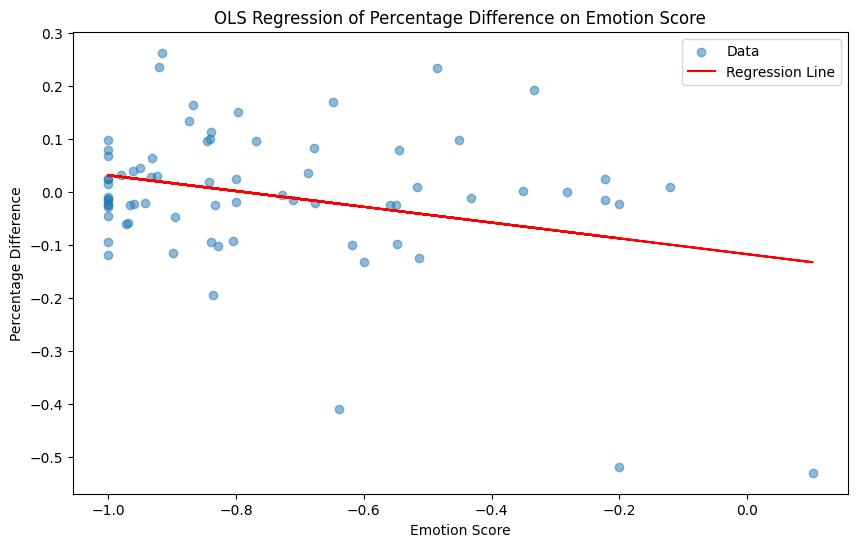

In [11]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["emotion_score"]
X = sm.add_constant(X)
y = df["percentage_difference"]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the full regression summary (this is very "econometrics textbook")
print(results.summary())

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df["emotion_score"], df["percentage_difference"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["emotion_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point with company names
# for i, row in df.iterrows():
#     plt.text(row["emotion_score"], row["percentage_difference"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Emotion Score")
plt.ylabel("Percentage Difference")
plt.title("OLS Regression of Percentage Difference on Emotion Score")
plt.legend()

# Show the plot
plt.show()

### Predicting Stock Percentage Change using Sentiment Analysis

                              OLS Regression Results                             
Dep. Variable:     percentage_difference   R-squared:                       0.007
Model:                               OLS   Adj. R-squared:                 -0.007
Method:                    Least Squares   F-statistic:                    0.4804
Date:                   Tue, 08 Apr 2025   Prob (F-statistic):              0.491
Time:                           00:11:57   Log-Likelihood:                 42.668
No. Observations:                     72   AIC:                            -81.34
Df Residuals:                         70   BIC:                            -76.78
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

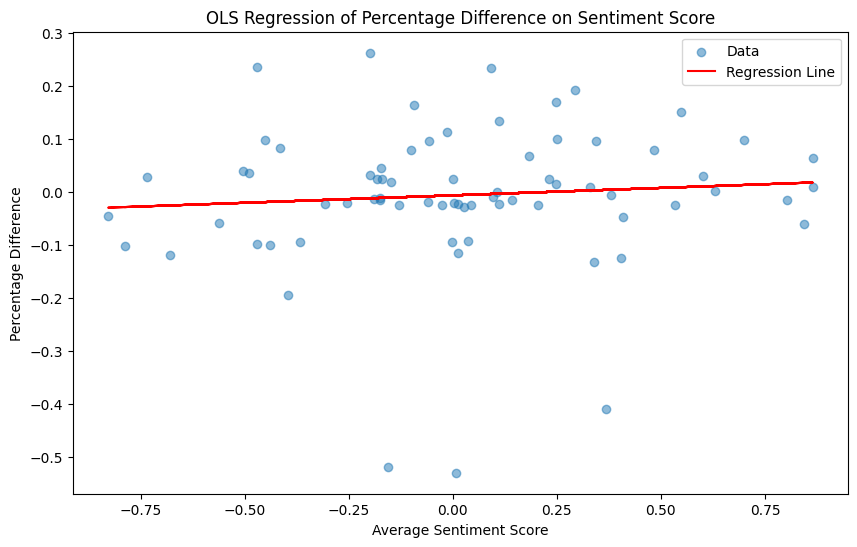

In [12]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["average_sentiment_score"]
X = sm.add_constant(X)
y = df["percentage_difference"]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the full regression summary (this is very "econometrics textbook")
print(results.summary())

plt.figure(figsize=(10, 6))
plt.scatter(df["average_sentiment_score"], df["percentage_difference"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["average_sentiment_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point with company names
# for i, row in df.iterrows():
#     plt.text(row["average_sentiment_score"], row["percentage_difference"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Average Sentiment Score")
plt.ylabel("Percentage Difference")
plt.title("OLS Regression of Percentage Difference on Sentiment Score")
plt.legend()

# Show the plot
plt.show()
